import the video

extracts the frame at position i-th or at j milliseconds

extracts the next frame

play the video (whole)

https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html

**note** read=grab+retrieve, read extracts the following frame, use set to decide which is the current


frames too high, showing first frame
True (1014, 4000, 3)


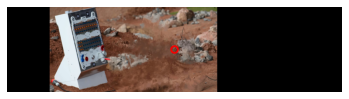

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
# Import additional library to properply play videos on jupyter notebook
from IPython.display import clear_output

doplay=0
selection_mode='position'# or 'position'
frame_number=500
frame_time=1000## milliseconds

videosrc='../images/z_other/video/video_task.avi'
cap = cv2.VideoCapture(videosrc)

if cap.isOpened():
    if selection_mode=='time':
        if frame_time<cap.get(7)*cap.get(5):## 5==CV_CAP_PROP_FPS 
            #set current frame at time frame_time-1 [ms]
            cap.set(0, frame_time-1)## 0==CV_CAP_PROP_POS_MSEC
        else: print('time too high, showing first frame')
    elif selection_mode=='position':
        if frame_number<cap.get(7):## 7== CV_CAP_PROP_FRAME_COUNT
            #set current frame=frame_number-th -1
            cap.set(1, frame_number-1)##1==CV_CAP_PROP_POS_FRAMES
        else: print('frames too high, showing first frame')
   
    # otherwise will take first frame of the video
    ret, frame = cap.read()

if ret and not frame is None:
    # Disabling matplotlib axis for better visualization
    plt.axis('off')
    #height,width and channels of the video
    print(ret, frame.shape)
    ##can also be retrieved if apposite cap.get(x) call:
    ## x=CV_CAP_PROP_FRAME_WIDTH=3
    ## x=CV_CAP_PROP_FRAME_HEIGHT=4
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()

#play the video with exception handling
if doplay:
    try:
        while(True):
            ret, frame = cap.read()
            if not ret or frame is None:
                cap.release()
                print("Released Video Resource")
                break

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.axis('off')
            plt.title("Input Stream")
            plt.imshow(frame)
            plt.show()
            # Clear cell output when new frame is available
            clear_output(wait=True)
    except KeyboardInterrupt:
        # If we press stop (jupyter GUI) release the video
        cap.release()
        print("Released Video Resource")
else: cap.release()

selection of the ROI, function will return coordinates in the image(video) frame

(305, 198, 123, 92)


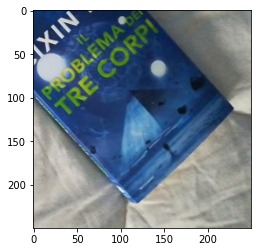

In [25]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

debug=0
frame_number=500

videosrc='../1-box/zimages/video/3bodybed.mp4'
cap = cv2.VideoCapture(videosrc)

if cap.isOpened():
    if frame_number<cap.get(7):
            cap.set(1, frame_number-1)
    ret, frame = cap.read()

if ret and not frame is None and debug:
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
fromCenter=False
roi = cv2.selectROI(frame, fromCenter)
#roi==[upperleftmost x,ulm y, width, heigth]
print(roi)
cv2.destroyAllWindows()
#plt.imshow(frame[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])])
plt.imshow(cv2.cvtColor(frame[roi[1]:roi[1]+roi[3],roi[0]:roi[0]+roi[2]],cv2.COLOR_BGR2RGB))
plt.show()

save the video

save a specific frame (order or timestamp)

### interpolation 
of more images for median/mean background

10


TypeError: Invalid shape (10, 480, 640, 3) for image data

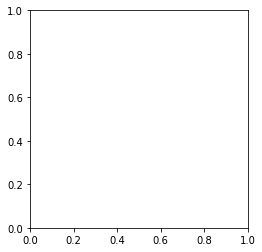

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Defining a variable interpolation for mean or median functions
interpolation = np.median # or np.mean

num_frame_bg = 10
bg = []
idx = 0
cap = cv2.VideoCapture('../images/video/3bodybed.mp4')

# Initialize the background image
try:
    while(cap.isOpened() and idx < num_frame_bg):
        ret, frame = cap.read()
        if ret and not frame is None:
            frame = frame.astype(float)
            # Getting all first n images
            bg.append(frame)
            idx += 1
        else:
            break
    cap.release()
    print(len(bg))
    bg_interpolated = np.stack(bg, axis=0)
    plt.imshow(bg_interpolated)
    plt.show()
    bg_interpolated = interpolation(bg_interpolated, axis=0)
    
    plt.imshow(cv2.cvtColor(bg_interpolated.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.show()
except KeyboardInterrupt:
    # If we press top release the video
    cap.release()
    print("Released Video Resource")

(1280, 723, 3)
(2560, 723, 3)


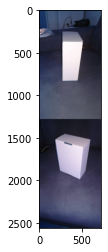

In [19]:
# IMAGE STACKING
import cv2
import numpy as np
from matplotlib import pyplot as plt

im1=cv2.imread('../images/box/box2.jpg')
im2=cv2.imread('../images/box/box3.jpg')
print(im1.shape)
im=np.stack
([image1,image2], axis=)
print(im.shape)
plt.imshow(im)
plt.show()